In [1]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/bullying_twitter_preprocessed.csv', sep=';', converters= {'unigrams': literal_eval, 'bigrams': literal_eval})

In [22]:
len(df)

1759

## Quantas palavras/letras temos nas amostras?

In [3]:
df['n_unigrams'] = df.unigrams.apply(len)
df['n_letters'] = df.original_text.apply(len)

### Palavras

In [4]:
df.n_unigrams.sum()

34546

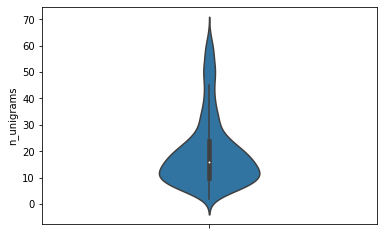

In [5]:
sns.violinplot(y=df.n_unigrams, width=0.3)

### Letras

In [6]:
df.n_letters.sum()

174560

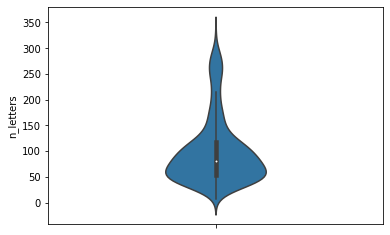

In [7]:
sns.violinplot(y=df.n_letters, width=0.3)

### Esses números diferem dependendo do target?

### Letras:

Tweets sobre bullying (target==1) costumam ter mais letras (talvez porque são descrições)

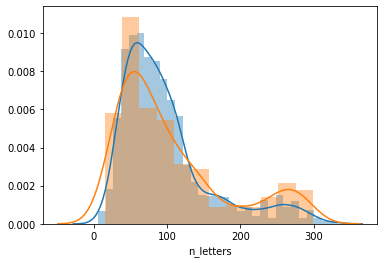

In [8]:
sns.distplot(df[df.target == 0]['n_letters'])
sns.distplot(df[df.target == 1]['n_letters'])

### Palavras

O mesmo padrão das letras se repete para o número de palavras

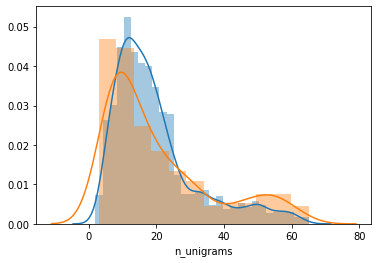

In [9]:
sns.distplot(df[df.target == 0]['n_unigrams'])
sns.distplot(df[df.target == 1]['n_unigrams'])

## O número de mentions/usos da palavra bullying direfe para o target?

In [10]:
df['user_mentions']= df.unigrams.apply(lambda t: len([u for u in t if u == "__username__"]))
df['bullying_mentions']= df.unigrams.apply(lambda t: len([u for u in t if u == "bullying"]))

### Mentions

Tweets sobre bullying tem levemente menos mentions (não sei se é estatisticamente relevante)

In [11]:
df.user_mentions.sum()

1093

In [12]:
df.user_mentions.value_counts()

0    886
1    714
2    115
3     33
4      7
6      2
5      2
Name: user_mentions, dtype: int64

In [13]:
df[df.target==1].user_mentions.value_counts(normalize=True)

0    0.537313
1    0.370149
2    0.065672
3    0.017910
4    0.005970
6    0.002985
Name: user_mentions, dtype: float64

In [14]:
df[df.target==0].user_mentions.value_counts(normalize=True)

0    0.495787
1    0.414326
2    0.065309
3    0.018961
4    0.003511
5    0.001404
6    0.000702
Name: user_mentions, dtype: float64

### Palavra "bullying"

Por outro lado, 96% dos tweets sobre bullying contém a palavra "bullying", enquanto ela aparece apenas em 13% dos casos negativos. No total os casos positivos somam 64% dos usos.

Isso está com certeza relacionado à seleção, mas selecionar tweets sobre bullying sem pesquisar por essa palavra iria tomar muito tempo. Pode ser um viés da classificação também.

Temos que ver se isso vai tornar o modelo muito enviesado para "é sobre bullying se tem a palavra 'bullying'". Neste caso podemos remover a palavra das amostras.

In [15]:
df.bullying_mentions.sum()

532

In [16]:
df.bullying_mentions.value_counts()

0    1240
1     506
2      13
Name: bullying_mentions, dtype: int64

In [17]:
df[df.target==1].bullying_mentions.sum()/df.bullying_mentions.sum()

0.6353383458646616

In [18]:
df[df.target==0].bullying_mentions.value_counts(normalize=True)

0    0.867275
1    0.129213
2    0.003511
Name: bullying_mentions, dtype: float64

In [19]:
df[df.target==1].bullying_mentions.value_counts(normalize=True)

1    0.961194
2    0.023881
0    0.014925
Name: bullying_mentions, dtype: float64

#### Número de usos da palavra por amostra para target = 0

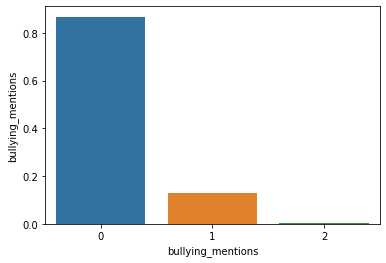

In [20]:
sns.barplot(x="bullying_mentions", y="bullying_mentions", data=df[df.target==0], estimator=lambda x: len(x) / len(df[df.target==0]))

#### Número de usos da palavra por amostra para target = 1

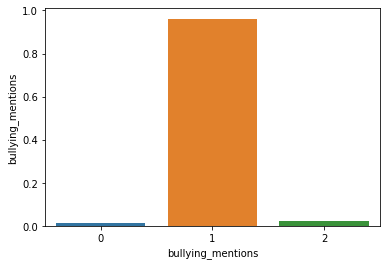

In [21]:
sns.barplot(x="bullying_mentions", y="bullying_mentions", data=df[df.target==1], estimator=lambda x: len(x) / len(df[df.target==1]))